In [21]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt


plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{physics}'
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

In [22]:
h5py.File('datasets/1.hdf5').keys()

<KeysViewHDF5 ['Covariances', 'Expected_returns', 'Final_circuit_sample_probabilities', 'Final_circuit_sample_states', 'Max_cost', 'Min_cost', 'Min_cost_state', 'N', 'Normalized_cost', 'Optimizer_maxfev', 'Optimizer_nfev', 'Rng_seed', 'k', 'layers', 'type']>

In [23]:
results_1, results_2, results_3 = {}, {}, {} 
for file_name in os.listdir('datasets'):
    if file_name != '.DS_Store':
        with h5py.File('datasets/'+file_name) as f:
            a = f['Min_cost_state'][()]
            b = f['Final_circuit_sample_probabilities'][()]
            c = f['Final_circuit_sample_states'][()]
            min_state_prob = None
            for idx in range(len(c)):
                if np.all(a == c[idx]):
                    min_state_prob = b[idx]
            if min_state_prob is None:
                min_state_prob = 0.0
            if f['type'][()] == 1:
                if f"layer_{f['layers'][()]}" not in list(results_1.keys()):
                    results_1[f"layer_{f['layers'][()]}"] = [min_state_prob]
                else:
                    results_1[f"layer_{f['layers'][()]}"].append(min_state_prob)
            if f['type'][()] == 2:
                if f"layer_{f['layers'][()]}" not in list(results_2.keys()):
                    results_2[f"layer_{f['layers'][()]}"] = [min_state_prob]
                else:
                    results_2[f"layer_{f['layers'][()]}"].append(min_state_prob)
            if f['type'][()] == 4:
                if f"layer_{f['layers'][()]}" not in list(results_3.keys()):
                    results_3[f"layer_{f['layers'][()]}"] = [min_state_prob]
                else:
                    results_3[f"layer_{f['layers'][()]}"].append(min_state_prob)


In [24]:
final_results_1, final_results_2, final_results_3 = {}, {}, {}
for layer in np.sort(list(results_1.keys())):
    final_results_1[layer] = (np.mean(results_1[layer]), np.std(results_1[layer]), np.max(results_1[layer]))
for layer in np.sort(list(results_2.keys())):
    final_results_2[layer] = (np.mean(results_2[layer]), np.std(results_2[layer]), np.max(results_2[layer]))
for layer in np.sort(list(results_3.keys())):
    final_results_3[layer] = (np.mean(results_3[layer]), np.std(results_3[layer]), np.max(results_3[layer]))

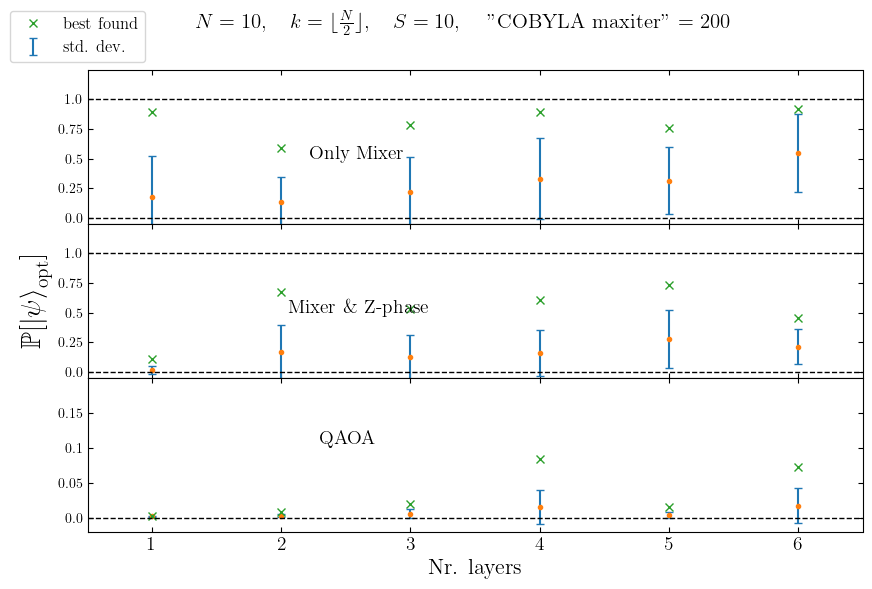

In [25]:
fig, ax = plt.subplots(3,1, figsize=(10,6))
fig.suptitle(r'$N=[2,3,...,7], \quad k=\lfloor\frac{N}{2}\rfloor, \quad S=20, \quad$ "COBYLA maxiter" = 200',size=15)
plt.subplots_adjust(hspace=0)
# Shared x-values
n_layers = [1 + i for i in range(len(list(final_results_1.keys())))]
err_scaling = 1

# Plottig stuff
ax[0].errorbar(n_layers, [final_results_1[key][0] for key in list(final_results_1.keys())], yerr = [err_scaling*final_results_1[key][1] for key in list(final_results_1.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[0].plot(n_layers,[final_results_1[key][0] for key in list(final_results_1.keys())], 'o', ms=3)
ax[0].plot(n_layers,[final_results_1[key][2] for key in list(final_results_1.keys())], 'x', ms=6, label='best found')

ax[1].errorbar(n_layers, [final_results_2[key][0] for key in list(final_results_2.keys())], yerr = [err_scaling*final_results_2[key][1] for key in list(final_results_2.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[1].plot(n_layers,[final_results_2[key][0] for key in list(final_results_2.keys())], 'o', ms=3)
ax[1].plot(n_layers,[final_results_2[key][2] for key in list(final_results_2.keys())], 'x', ms=6, label='best found')

ax[2].errorbar(n_layers, [final_results_3[key][0] for key in list(final_results_3.keys())], yerr = [err_scaling*final_results_3[key][1] for key in list(final_results_3.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[2].plot(n_layers,[final_results_3[key][0] for key in list(final_results_3.keys())], 'o', ms=3)
ax[2].plot(n_layers,[final_results_3[key][2] for key in list(final_results_3.keys())], 'x', ms=6, label='best found')



ax[0].text(2.225,0.5,'Only Mixer',size=14)
ax[1].text(2.05,0.5,r'Mixer \& Z-phase',size=14)
ax[2].text(2.3,0.105,r'QAOA',size=14)

_y_ticks_ = [0.0,0.25,0.50,0.75,1.00]
for _ax_ in range(3):
    ax[_ax_].set_xlim(0.5,5.5)
    if _ax_ != 2:
        ax[_ax_].set_ylim(-0.05,1.25)
        ax[_ax_].hlines(0,0.5,5.5, ls='--',color='k',lw=1)
        ax[_ax_].hlines(1,0.5,5.5, ls='--',color='k',lw=1)
        ax[_ax_].set_yticks(_y_ticks_)
        ax[_ax_].set_yticklabels([str(v) for v in _y_ticks_])
    if _ax_ == 2:
        _y_ticks_2 = [0.0,0.05,0.10,0.15]
        ax[_ax_].hlines(0,0.5,5.5, ls='--',color='k',lw=1)
        ax[_ax_].set_yticks(_y_ticks_2)
        ax[_ax_].set_yticklabels([str(v) for v in _y_ticks_2])
        ax[_ax_].set_ylim(-0.02,0.2)

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[1].set_ylabel(r'$\mathbb{P}[\ket{\psi}_{\text{opt}}]$', size=20)

ax[0].legend(loc=(-0.1,1.05),fontsize=12)

ax[2].set_xticks(n_layers)
ax[2].set_xticklabels([str(layer) for layer in n_layers], size=14)
ax[2].set_xlabel(r'Nr. layers', size=16)


plt.savefig('plots/out_1.png', dpi=300)
plt.show()